# Visualiser des projections
### Vue d'ensemble

Avec les exemples antérieurs, vous êtes capables d'obtenir des projections climatiques pour chaque bassin versant.

Faire ce travail en ligne est assez gourmand en termes de stockage nécessaire et de temps de calcul.  
Ainsi, j'ai fait l'ai fait pour vous.
Le code que j'ai utilisé est disponible sur `modules/Data_per_basin.py` (il n'est pas pensé pour Jupyter Notebooks, mais pour un IDE plus complet - nous le verrons après).

Nous allons d'abord charger les données de toutes les 21 projections du domaine CORDEX Afrique "complètes" pour les scénarios `historique`, `rcp45` et `rcp85`.

In [31]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt

sns.set_context('paper')

projections_path = Path(r'data/projections.csv')
projections = pd.read_csv(projections_path, header=[0, 1, 2, 3], index_col=0)
projections.index = pd.to_datetime(projections.index, format='%Y-%m-%d')
projections = projections.sort_index(axis=0)
projections = projections.sort_index(axis=1)
projections

Variable                                       pr  \
Experiment                             historical   
Zone                                           Q1   
Code            CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
Production date                                     
1949-01-01                                    NaN   
1949-02-01                                    NaN   
1949-03-01                                    NaN   
1949-04-01                                    NaN   
1949-05-01                                    NaN   
...                                           ...   
2100-08-01                                    NaN   
2100-09-01                                    NaN   
2100-10-01                                    NaN   
2100-11-01                                    NaN   
2100-12-01                                    NaN   

Variable                                            \
Experiment                                           
Zone                                                 
Code            CCCma-CanESM2_r1i1p1_UQAM-CRCM5_v1   
Production date                                      
1949-01-01                                     NaN   
1949-02-01                                     NaN   
1949-03-01                                     NaN   
1949-04-01                                     NaN   
1949-05-01                                     NaN   
...                                            ...   
2100-08-01                                     NaN   
2100-09-01                                     NaN   
2100-10-01                                     NaN   
2100-11-01                                     NaN   
2100-12-01                                     NaN   

Variable                                                           \
Experiment                                                          
Zone                                                                
Code            CNRM-CERFACS-CNRM-CM5_r1i1p1_CLMcom-CCLM4-8-17_v1   
Production date                                                     
1949-01-01                                                    NaN   
1949-02-01                                                    NaN   
1949-03-01                                                    NaN   
1949-04-01                                                    NaN   
1949-05-01                                                    NaN   
...                                                           ...   
2100-08-01                                                    NaN   
2100-09-01                                                    NaN   
2100-10-01                                                    NaN   
2100-11-01                                                    NaN   
2100-12-01                                                    NaN   

Variable                                                   \
Experiment                                                  
Zone                                                        
Code            CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4_v1   
Production date                                             
1949-01-01                                            NaN   
1949-02-01                                            NaN   
1949-03-01                                            NaN   
1949-04-01                                            NaN   
1949-05-01                                            NaN   
...                                                   ...   
2100-08-01                                            NaN   
2100-09-01                                            NaN   
2100-10-01                                            NaN   
2100-11-01                                            NaN   
2100-12-01                                            NaN   

Variable                                                       \
Experiment                                                      
Zone                                                            
Code     

### Extraire des données historiques de précipitation pour un bassin versant
Nous allons extraire des précipitations `pr`, pour la période `historique` et le bassin `Q16`.

L'opérateurs `.loc` et `.iloc` sont très utiles.  
`.dropna()` nous permet d'effecer les lignes ayant des valeurs manquantes.

In [32]:
precipitation_Q16 = projections.loc[:, ('pr', 'historical', 'Q16')]
precipitation_Q16 = precipitation_Q16.dropna()
precipitation_Q16

Code,CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1,CCCma-CanESM2_r1i1p1_UQAM-CRCM5_v1,CNRM-CERFACS-CNRM-CM5_r1i1p1_CLMcom-CCLM4-8-17_v1,CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4_v1,CSIRO-QCCCE-CSIRO-Mk3-6-0_r1i1p1_SMHI-RCA4_v1,ICHEC-EC-EARTH_r12i1p1_CLMcom-CCLM4-8-17_v1,ICHEC-EC-EARTH_r12i1p1_MPI-CSC-REMO2009_v1,ICHEC-EC-EARTH_r12i1p1_SMHI-RCA4_v1,ICHEC-EC-EARTH_r1i1p1_KNMI-RACMO22T_v1,ICHEC-EC-EARTH_r3i1p1_DMI-HIRHAM5_v2,...,MIROC-MIROC5_r1i1p1_SMHI-RCA4_v1,MOHC-HadGEM2-ES_r1i1p1_KNMI-RACMO22T_v2,MOHC-HadGEM2-ES_r1i1p1_SMHI-RCA4_v1,MPI-M-MPI-ESM-LR_r1i1p1_CLMcom-CCLM4-8-17_v1,MPI-M-MPI-ESM-LR_r1i1p1_MPI-CSC-REMO2009_v1,MPI-M-MPI-ESM-LR_r1i1p1_SMHI-RCA4_v1,MPI-M-MPI-ESM-LR_r1i1p1_UQAM-CRCM5_v1,NCC-NorESM1-M_r1i1p1_DMI-HIRHAM5_v1,NCC-NorESM1-M_r1i1p1_SMHI-RCA4_v1,NOAA-GFDL-GFDL-ESM2M_r1i1p1_SMHI-RCA4_v1
Production date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,83.519684,121.468190,36.758717,146.037190,25.491802,102.123730,198.556550,151.576130,12.102794,16.903313,...,78.343630,37.757633,38.350212,3.725140,5.365904,4.155438,5.558324,1.029581e+00,0.000000,10.506733
1951-02-01,66.701980,114.186920,93.086020,97.948410,0.731013,0.120863,7.136539,8.096432,62.700867,51.630886,...,18.250160,35.200203,26.355572,63.339886,149.216490,87.115776,123.269485,3.606104e+00,34.728065,131.400710
1951-03-01,13.533960,30.095173,32.160248,63.526333,65.524475,48.408657,79.424720,56.389797,64.862200,4.706532,...,68.067535,5.378952,1.622949,30.288330,36.319523,16.594992,42.160374,8.976765e+00,13.180780,67.169426
1951-04-01,31.802258,90.403534,0.139217,5.506721,6.193367,48.648240,62.485306,38.176617,68.242485,13.176017,...,53.723854,99.432530,57.511055,11.241804,18.965336,19.481540,29.047138,6.006678e+00,58.357130,36.722160
1951-05-01,7.526340,6.714736,0.007512,2.745702,2.142334,2.003096,17.519630,22.742582,40.407350,19.514826,...,11.891293,56.480766,61.205124,16.071259,25.881443,22.229359,45.592075,1.296875e+00,5.980506,69.921820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-01,1.223462,5.447430,0.000000,1.296529,0.804608,0.000000,4.542453,7.754517,10.554913,1.549680,...,3.182339,3.256752,16.545517,0.949405,0.831823,9.003157,6.951947,4.960664e-12,15.517489,5.542110
2005-09-01,12.775834,3.176885,0.000021,28.656368,20.880362,18.994617,7.213900,1.276457,94.410270,62.334946,...,3.769685,8.674233,10.130928,7.088855,1.823097,3.172481,6.772432,7.478631e-03,10.104077,29.251100
2005-10-01,3.937473,24.244213,24.691935,51.917270,19.955510,23.131100,50.941883,154.923610,3.425956,63.178430,...,67.710290,11.272465,15.459032,23.005901,47.911884,42.378883,60.508102,1.821421e+01,30.471573,21.168930


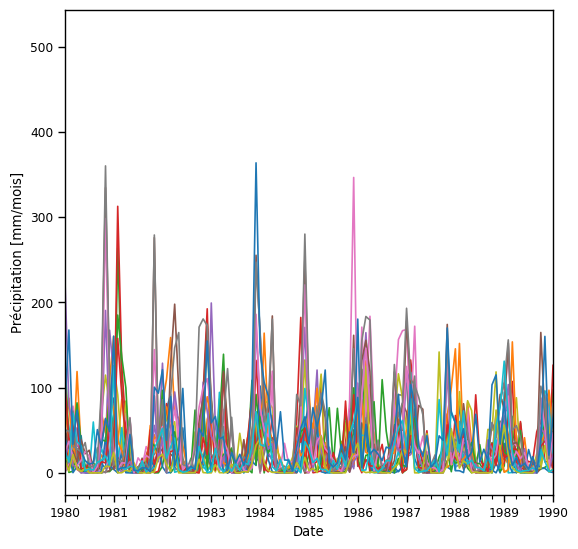

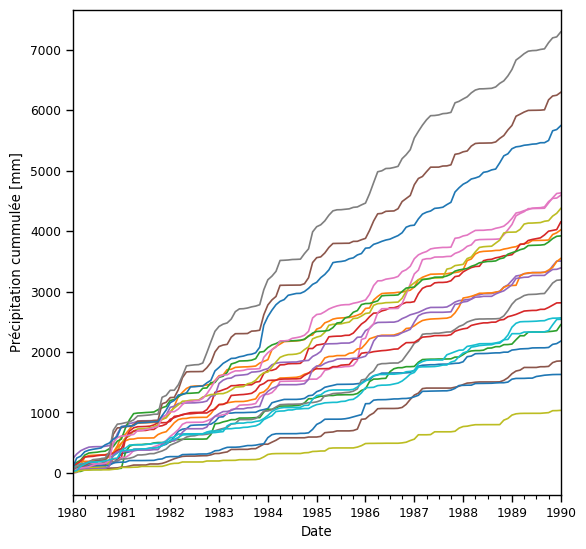

In [40]:
fig, ax = plt.subplots(figsize=(16/2.54,16/2.54))
precipitation_Q16.plot(ax=ax)
ax.set_xlim(('1980-01-01','1990-01-01'))
ax.get_legend().remove()
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Précipitation [mm/mois]')

fig, ax = plt.subplots(figsize=(16/2.54,16/2.54))
precipitation_Q16.loc['1980-01-01':'1990-01-01',:].cumsum().plot(ax=ax)
ax.get_legend().remove()
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Précipitation cummulée [mm]')

### Analyse
Attendiez-vous cela pour la période historique?


### Des pâtes...
![](img/Pasta.jpg)

### Et la température?

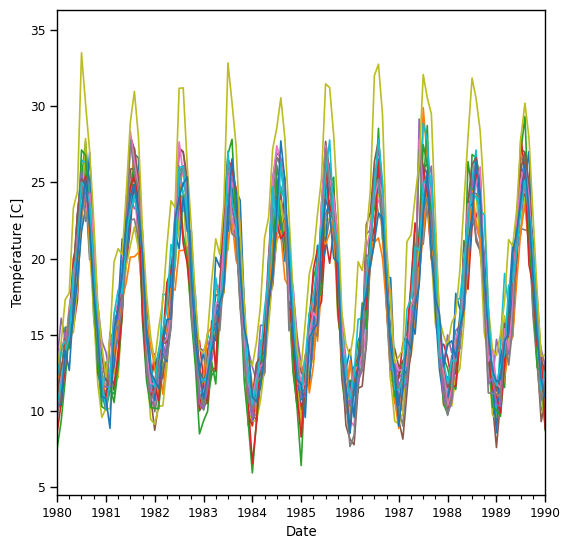

In [37]:
temperature_Q16 = projections.loc[:, ('tas', 'historical', 'Q16')]
temperature_Q16 = temperature_Q16.dropna()

fig, ax = plt.subplots(figsize=(16/2.54,16/2.54))
temperature_Q16.plot(ax=ax)
ax.set_xlim(('1980-01-01','1990-01-01'))
ax.get_legend().remove()
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Température [C]')

### Une manière préférable de présenter des projections
**Regarder ces projections au mois prés n'est pas "logique"** dans le sens que les projections ont été conçues pour reproduire  des comportements statistiques, pas pour "deviner" la météorologie future.

Pour 
